In [1]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import datetime
import statsmodels.formula.api as smf
import matplotlib as mpl
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

## 0. 预处理

- 导入数据

In [2]:
dt = pd.read_csv("data.csv", index_col=0)

- 生成类别dummy变量

> 数量大于200的类别: `['食品', '公益', '原创设计', '文化传承', '健康医疗', '智能家居', '健康生活', '设计家居', '数码周边', '品质家居', '个人护理', '车品', '专属定制', '时尚科技']`
>
> 得到这些类别对应的筛选标准

`grouped.sort_values(ascending=False)`根据值排序

In [5]:
grouped = dt.groupby("所属类别").size()  # 获取项目数量大于200的类别
selected = grouped[grouped > 100].sort_values(ascending=False).index

In [7]:
cate = dt["所属类别"].map(lambda x: x in selected)

In [9]:
cate_dt = dt[cate]  # 数量大于100对应的项目

In [10]:
dummy = pd.get_dummies(cate_dt['所属类别'], prefix='类别', drop_first=False)  # 转换为one-hot变量
dummy.head()

,类别_专属定制,类别_个人护理,类别_健康医疗,类别_健康生活,类别_公益,类别_原创设计,类别_品质家居,类别_数码周边,类别_文化传承,类别_时尚科技,类别_智能家居,类别_设计家居,类别_车品,类别_食品
100009,0,0,0,0,0,0,0,0,0,0,1,0,0,0
100010,0,0,0,0,0,1,0,0,0,0,0,0,0,0
100031,0,0,0,0,0,1,0,0,0,0,0,0,0,0
100034,0,0,0,0,0,1,0,0,0,0,0,0,0,0
100040,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [11]:
cate_dt = pd.concat([cate_dt, dummy], axis=1)  # 增加dummy变量

## 1. 描述性

In [102]:
is_demo_cols = ['is_轮播', 'is_热门推荐', 'is_各类版块总时长']  # 是否展示 'is_即将上架', 'is_最新上架', 'is_即将结束'
demo_cols = ['轮播', '热门推荐', '各类版块总时长']  # 展示时长 '即将上架', '最新上架', '即将结束'
demo_begin_cols = ['begin_轮播', 'begin_热门推荐', 'begin_各类版块']  # 开始展示时间 'begin_即将上架', 'begin_最新上架', 'begin_即将结束'
cate_cols = ['类别_个人护理', '类别_健康医疗', '类别_健康生活', '类别_公益', '类别_原创设计', '类别_品质家居', 
             '类别_数码周边', '类别_文化传承', '类别_智能家居', '类别_车品','类别_食品']  # 类别
base_cols = ['关注数', '支持者数', '评论数量', '档位数量', '绝对时间跨度', '相对时间跨度', '完成百分比', 
            '推荐页面总时长']

### 1.1 完成百分比的柱状图

<AxesSubplot:ylabel='Frequency'>

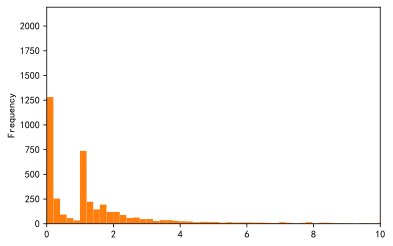

In [13]:
cate_dt.完成百分比.plot()
cate_dt[cate_dt.完成百分比 < 20].完成百分比.plot.hist(bins=100, xlim=[0, 10])

In [14]:
cate_dt[cate_dt.完成百分比 == 0]

,轮播_left,即将上架,demostr_proj_健康出行_左上大图,demostr_proj_健康出行_其它图,demostr_proj_生活美学_左上大图,demostr_proj_生活美学_其它图,demostr_proj_文化艺术_左上大图,demostr_proj_文化艺术_其它图,demostr_proj_惠民扶贫_左上大图,demostr_proj_惠民扶贫_其它图,...,类别_公益,类别_原创设计,类别_品质家居,类别_数码周边,类别_文化传承,类别_时尚科技,类别_智能家居,类别_设计家居,类别_车品,类别_食品
105585,0.0,85.254722,0.000000,0.0,0.0,0.0,0.0,0.0000,42.0,1068.000278,...,1,0,0,0,0,0,0,0,0,0
105585,0.0,85.254722,0.000000,0.0,0.0,0.0,0.0,0.0000,42.0,1068.000278,...,1,0,0,0,0,0,0,0,0,0
106401,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,...,0,1,0,0,0,0,0,0,0,0
106802,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,...,0,0,0,0,0,0,0,1,0,0
107627,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,89.9975,0.0,0.000000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826349182,0.0,18.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,...,0,0,0,0,1,0,0,0,0,0
1826349189,0.0,12.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
1826939445,0.0,12.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
1834215536,0.0,84.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,594.0,1002.000000,...,1,0,0,0,0,0,0,0,0,0


In [15]:
for c in cate_dt.columns:
    print(c)

轮播_left
即将上架
demostr_proj_健康出行_左上大图
demostr_proj_健康出行_其它图
demostr_proj_生活美学_左上大图
demostr_proj_生活美学_其它图
demostr_proj_文化艺术_左上大图
demostr_proj_文化艺术_其它图
demostr_proj_惠民扶贫_左上大图
demostr_proj_惠民扶贫_其它图
demostr_proj_美食市集_左上大图
demostr_proj_美食市集_其它图
demostr_proj_新奇酷玩_左上大图
demostr_proj_新奇酷玩_其它图
即将结束
热门推荐
最新上架
轮播_rt
轮播_rbr
轮播_rbl
状态
众筹期限
公司名称
公司地址
公司工作时间
公司电话
发起人名称
发起人链接
所属类别
目标金额
项目名称
状态变换时间0-1
状态变换时间1-2
状态变换时间2-3
状态变换时间3-4
评论数量
档位数量
筹集金额
关注数
支持者数
点赞数
完成百分比
绝对时间跨度
相对时间跨度
begin_轮播_left
begin_即将上架
begin_demostr_proj_健康出行_左上大图
begin_demostr_proj_健康出行_其它图
begin_demostr_proj_生活美学_左上大图
begin_demostr_proj_生活美学_其它图
begin_demostr_proj_文化艺术_左上大图
begin_demostr_proj_文化艺术_其它图
begin_demostr_proj_惠民扶贫_左上大图
begin_demostr_proj_惠民扶贫_其它图
begin_demostr_proj_美食市集_左上大图
begin_demostr_proj_美食市集_其它图
begin_demostr_proj_新奇酷玩_左上大图
begin_demostr_proj_新奇酷玩_其它图
begin_即将结束
begin_热门推荐
begin_最新上架
begin_轮播_left_完成百分比
begin_即将上架_完成百分比
begin_demostr_proj_健康出行_左上大图_完成百分比
begin_demostr_proj_健康出行_其它图_完成百分比
begin_demostr_proj_生活美学_左上大图_完成

In [103]:
ratio_dict = {'is_轮播': [], 'is_各类版块总时长': [], 'is_热门推荐': []}  # 'is_即将上架': [], 'is_最新上架': [],  'is_即将结束': []
for i in np.arange(0, 20, 0.5):
    for k in ratio_dict:
        x = cate_dt[cate_dt.完成百分比 >= i][k].value_counts().values
        ratio_dict[k].append(x[1]/np.sum(x))

In [104]:
cate_dt[cate_dt.完成百分比 >= 2]['is_最新上架'].value_counts()

1    633
0    453
Name: is_最新上架, dtype: int64

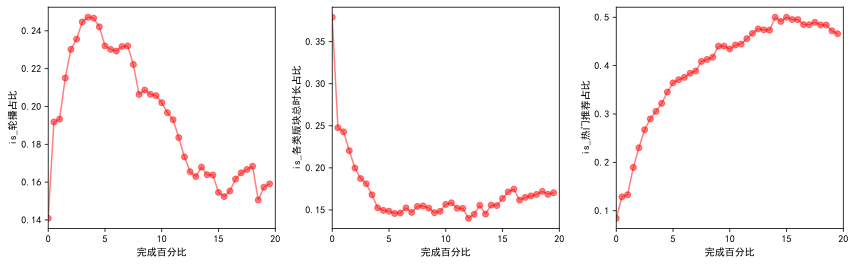

In [105]:
fig = plt.figure(figsize=[12, 7])
for i, k in enumerate(ratio_dict):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xlim([0, 20])
#     ax.set_ylim([0, 0.6])
    ax.plot(np.arange(0, 20, 0.5), ratio_dict[k], 'ro-', alpha=0.5)
    ax.set_xlabel(f'完成百分比')
    ax.set_ylabel(f'{k}占比')
fig.tight_layout()

> 最新上架: 完成百分比阈值越大，出现在最新上架上的比例越小

### 1.2 描述性统计

In [106]:
cate_dt[demo_cols].describe()

,轮播,热门推荐,各类版块总时长
count,4224.000000,4224.000000,4224.000000
mean,42.660463,21.410797,437.741873
std,165.896682,124.921376,613.847841
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,108.000000
75%,0.000000,0.000000,707.994931
max,2184.000000,1698.000278,4091.999722


In [107]:
cate_dt[is_demo_cols].describe()

,is_轮播,is_热门推荐,is_各类版块总时长
count,4224.000000,4224.000000,4224.000000
mean,0.140862,0.084280,0.620975
std,0.347920,0.277841,0.485202
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [108]:
cate_dt[demo_begin_cols].describe()

,begin_轮播,begin_热门推荐,begin_各类版块
count,4224.000000,4224.000000,4224.000000
mean,46.288398,30.343517,124.391578
std,155.180465,149.750137,238.423407
min,-144.000221,0.000000,-96.000221
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,24.000261
75%,0.000000,0.000000,95.997081
max,1895.999244,1992.002837,1775.999873


### 1.3 变量间相关性

In [109]:
cate_dt[is_demo_cols].corr()

,is_轮播,is_热门推荐,is_各类版块总时长
is_轮播,1.000000,0.090277,0.114351
is_热门推荐,0.090277,1.000000,0.207155
is_各类版块总时长,0.114351,0.207155,1.000000


In [110]:
cate_dt[demo_cols].corr()

,轮播,热门推荐,各类版块总时长
轮播,1.000000,0.108172,0.160464
热门推荐,0.108172,1.000000,0.372542
各类版块总时长,0.160464,0.372542,1.000000


In [111]:
cate_dt[demo_begin_cols].corr()

,begin_轮播,begin_热门推荐,begin_各类版块
begin_轮播,1.000000,0.005005,0.095106
begin_热门推荐,0.005005,1.000000,0.050472
begin_各类版块,0.095106,0.050472,1.000000


In [112]:
col_name = [*base_cols, *demo_cols]
cate_dt[col_name].corr()

,关注数,支持者数,评论数量,档位数量,绝对时间跨度,相对时间跨度,完成百分比,推荐页面总时长,轮播,热门推荐,各类版块总时长
关注数,1.000000,0.582008,0.243525,0.044399,-0.155612,-0.177840,0.009531,0.314978,0.075940,0.359781,0.286641
支持者数,0.582008,1.000000,0.290468,0.035252,-0.257339,-0.305397,0.066187,0.378355,0.108810,0.556164,0.316131
评论数量,0.243525,0.290468,1.000000,0.115536,-0.288277,-0.324075,0.015501,0.319176,0.092124,0.311718,0.284242
档位数量,0.044399,0.035252,0.115536,1.000000,-0.100621,-0.140120,-0.005722,-0.079632,-0.039102,-0.034115,-0.057894
绝对时间跨度,-0.155612,-0.257339,-0.288277,-0.100621,1.000000,0.893716,-0.099355,-0.269626,-0.141750,-0.160471,-0.231611
相对时间跨度,-0.177840,-0.305397,-0.324075,-0.140120,0.893716,1.000000,-0.109753,-0.397028,-0.171985,-0.197095,-0.361075
完成百分比,0.009531,0.066187,0.015501,-0.005722,-0.099355,-0.109753,1.000000,0.021789,-0.003516,0.035167,0.016744
推荐页面总时长,0.314978,0.378355,0.319176,-0.079632,-0.269626,-0.397028,0.021789,1.000000,0.304332,0.499252,0.940177
轮播,0.075940,0.108810,0.092124,-0.039102,-0.141750,-0.171985,-0.003516,0.304332,1.000000,0.108172,0.160464
热门推荐,0.359781,0.556164,0.311718,-0.034115,-0.160471,-0.197095,0.035167,0.499252,0.108172,1.000000,0.372542


### 1.4 散点图

           热门推荐     完成百分比
热门推荐   1.000000  0.034559
完成百分比  0.034559  1.000000


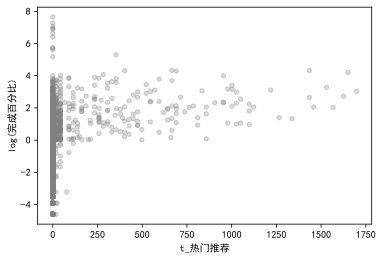

In [113]:
col = demo_cols[1]
p_dt = cate_dt[(cate_dt.完成百分比 > 0)]
plt.scatter(p_dt[col], np.log(p_dt['完成百分比']), c='grey', s=20, alpha=0.3)
plt.xlabel(f't_{col}')
plt.ylabel('log(完成百分比)')
print(p_dt[[col, '完成百分比']].corr())

## 倾向得分匹配(`PSM`)

In [50]:
import statsmodels.api as sm

In [114]:
target_dt = cate_dt.loc[cate_dt.完成百分比 > 0, :]

In [115]:
formula = f"is_热门推荐 ~ " + '+'.join(control_vars)
model = sm.Logit.from_formula(formula, data=target_dt)
re = model.fit()

Optimization terminated successfully.
         Current function value: 0.218552
         Iterations 9


计算倾向匹配得分

In [116]:
X = target_dt[control_vars]
target_dt.loc[:, 'ps'] = re.predict(X)

/usr/local/python39/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [117]:
target_dt.head()

,轮播_left,即将上架,demostr_proj_健康出行_左上大图,demostr_proj_健康出行_其它图,demostr_proj_生活美学_左上大图,demostr_proj_生活美学_其它图,demostr_proj_文化艺术_左上大图,demostr_proj_文化艺术_其它图,demostr_proj_惠民扶贫_左上大图,demostr_proj_惠民扶贫_其它图,...,类别_原创设计,类别_品质家居,类别_数码周边,类别_文化传承,类别_时尚科技,类别_智能家居,类别_设计家居,类别_车品,类别_食品,ps
100009,0.0,16.146944,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0.003731
100010,0.0,35.185556,0.0,0.0,22.146944,22.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0.008951
100031,0.0,117.965556,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0.006665
100034,0.0,46.146111,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0.000227
100040,0.0,117.965556,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0.009176


匹配

In [118]:
target_dt['is_热门推荐'].value_counts()

0    3687
1     352
Name: is_热门推荐, dtype: int64

In [124]:
target_dt[target_dt['is_热门推荐'] == 1][['is_热门推荐', 'ps']]

,is_热门推荐,ps
100164,1,0.013405
108602,1,0.133990
108739,1,0.451630
108787,1,0.267167
109284,1,0.316769
...,...,...
1842435244,1,0.043503
1842435249,1,0.101041
1842435347,1,0.077144
1842652262,1,0.021559


In [125]:
control_group = target_dt[target_dt['is_热门推荐'] == 0][['is_热门推荐', 'ps']]
experim_group = target_dt[target_dt['is_热门推荐'] == 1][['is_热门推荐', 'ps']]

In [142]:
match_idx = []
for idx in experim_group.index:
    abs_dis = (control_group.ps - experim_group.loc[idx, 'ps']).abs()
    idx = abs_dis.idxmin()
    match_idx.append(idx)

In [144]:
len(match_idx), len(set(match_idx))

(352, 251)

In [152]:
target_dt.loc[match_idx,:]['完成百分比'].describe()  # 对照组

count    355.000000
mean       5.912704
std       23.492957
min        0.010000
25%        1.070000
50%        2.020000
75%        5.670000
max      309.000000
Name: 完成百分比, dtype: float64

In [153]:
target_dt.loc[experim_group.index,:]['完成百分比'].describe()  # 对照组

count    352.000000
mean       9.498778
std       16.583651
min        0.010000
25%        1.760000
50%        3.800000
75%        9.780000
max      199.460000
Name: 完成百分比, dtype: float64

## 2. OLS回归分析

> 完成百分比大于0, 各版块时间大于0的样本数量:
> 
> 最新上架: 1356, 各类版块总时长: 1731, 热门推荐: 301, 即将结束: 2127

**假设1: 在热门推荐的呈现时间越早，对最终完成百分比的影响越大**

**假设1-a: 在热门推荐的呈现时间越长，对最终完成百分比的影响越大**

**假设2: 在各类板块呈现时间越早，对最终完成百分比的影响越大**

**假设2-a: 在各类板块呈现时间越长，对最终完成百分比的影响越大**

**假设3: 初始完成百分比对以上因素对最终完成百分比的调节影响**

**假设4: 首次呈现时间对以上因素对最终完成完成比的调节影响**

```python
is_demo_cols = ['is_即将上架', 'is_最新上架', 'is_轮播', 'is_热门推荐', 'is_各类版块总时长', 'is_即将结束']  # 是否展示
demo_cols = ['即将上架', '最新上架', '轮播', '热门推荐', '各类版块总时长', '即将结束']  # 展示时长
demo_begin_cols = ['begin_即将上架', 'begin_最新上架', 'begin_轮播', 'begin_热门推荐', 'begin_各类版块', 'begin_即将结束']
cate_cols = ['类别_个人护理', '类别_健康医疗', '类别_健康生活', '类别_公益', '类别_原创设计', '类别_品质家居', 
             '类别_数码周边', '类别_文化传承', '类别_智能家居', '类别_车品','类别_食品']  # 类别
base_cols = ['关注数', '支持者数', '评论数量', '档位数量', '绝对时间跨度', '相对时间跨度', '完成百分比', 
            '推荐页面总时长', '众筹期限']
```

- `control_vars`

In [119]:
control_vars = ['关注数', '支持者数', '点赞数', '评论数量', '档位数量', '众筹期限', '目标金额', *cate_cols]

In [120]:
mod = smf.ols(formula='np.log(完成百分比)~' + '+'.join(control_vars), 
              data=cate_dt[cate_dt.完成百分比 > 0])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(完成百分比)   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     91.01
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          1.41e-281
Time:                        16:07:54   Log-Likelihood:                -7621.3
No. Observations:                4039   AIC:                         1.528e+04
Df Residuals:                    4020   BIC:                         1.540e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6988      0.132    -12.848      0.000      -1.958      -1.440
关注数        -9.885e-05   3.58e-05     -2.764      0.006      -0.000   -2.87e-05
支持者数           0.0004   2.75e-05     14.370      0.000       0.000       0.000
点赞数         9.719e-05   4.54e-05      2.138      0.033    8.08e-06       0.000
评论数量           0.0110      0.001     20.147      0.000       0.010       0.012
档位数量           0.1585      0.023      6.900      0.000       0.113       0.204
众筹期限           0.0203      0.003      7.818      0.000       0.015       0.025
目标金额       -8.343e-06   5.75e-07    -14.502      0.000   -9.47e-06   -7.21e-06
类别_个人护理       -0.6073      0.169     -3.592      0.000      -0.939      -0.276
类别_健康医疗       -0.2401      0.145     -1.655      0.098      -0.525       0.044
类别_健康生活        0.3326      0.153      2.169      0.030       0.032       0.633
类别_公益          0.7968      0.109      7.330      0.000       0.584       1.010
类别_原创设计       -0.1641      0.109     -1.505      0.132      -0.378       0.050
类别_品质家居       -0.2978      0.167     -1.781      0.075      -0.626       0.030
类别_数码周边       -0.0110      0.160     -0.068      0.946      -0.326       0.304
类别_文化传承        0.8278      0.119      6.973      0.000       0.595       1.061
类别_智能家居       -0.1758      0.151     -1.168      0.243      -0.471       0.119
类别_车品         -0.0953      0.172     -0.553      0.580      -0.433       0.243
类别_食品         -0.0929      0.103     -0.906      0.365      -0.294       0.108
==============================================================================
Omnibus:                       90.775   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.091
Skew:                          -0.320   Prob(JB):                     1.51e-23
Kurtosis:                       3.464   Cond. No.                     8.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2.1 是否出现：`control_vars + is_demo_cols`

- 生成类别dummy变量

> 数量大于200的类别: `['食品', '原创设计', '公益', '文化传承', '智能家居', '健康医疗', '数码周边', '车品', '健康生活', '品质家居', '个人护理', '品质家居', '设计家居', '可穿戴', '专属定制', '手机周边', '时尚科技']`
>
> 得到这些类别对应的筛选标准

In [121]:
mod = smf.ols(formula='np.log(完成百分比)~' + '+'.join([*control_vars, *is_demo_cols]), 
              data=cate_dt[(cate_dt.完成百分比 > 1)])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(完成百分比)   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     48.58
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          1.33e-167
Time:                        16:08:05   Log-Likelihood:                -2887.7
No. Observations:                2466   AIC:                             5819.
Df Residuals:                    2444   BIC:                             5947.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0884      0.087     -1.012      0.312      -0.260       0.083
关注数        -8.191e-05   1.78e-05     -4.595      0.000      -0.000    -4.7e-05
支持者数           0.0002   1.41e-05     13.620      0.000       0.000       0.000
点赞数         9.467e-05   2.33e-05      4.066      0.000     4.9e-05       0.000
评论数量           0.0027      0.000      8.949      0.000       0.002       0.003
档位数量           0.0504      0.013      3.997      0.000       0.026       0.075
众筹期限           0.0122      0.002      7.750      0.000       0.009       0.015
目标金额       -3.978e-06   3.81e-07    -10.435      0.000   -4.73e-06   -3.23e-06
类别_个人护理        0.2765      0.125      2.205      0.028       0.031       0.522
类别_健康医疗        0.3112      0.099      3.136      0.002       0.117       0.506
类别_健康生活        0.1448      0.095      1.525      0.127      -0.041       0.331
类别_公益          0.4378      0.068      6.455      0.000       0.305       0.571
类别_原创设计        0.1481      0.071      2.094      0.036       0.009       0.287
类别_品质家居       -0.0247      0.114     -0.218      0.828      -0.247       0.198
类别_数码周边       -0.0201      0.099     -0.203      0.839      -0.214       0.174
类别_文化传承        0.2625      0.073      3.598      0.000       0.119       0.406
类别_智能家居        0.0752      0.103      0.732      0.464      -0.126       0.277
类别_车品         -0.0202      0.110     -0.184      0.854      -0.236       0.196
类别_食品          0.1690      0.067      2.526      0.012       0.038       0.300
is_轮播          0.0710      0.041      1.733      0.083      -0.009       0.151
is_热门推荐        0.4957      0.053      9.421      0.000       0.393       0.599
is_各类版块总时长     0.0461      0.038      1.210      0.226      -0.029       0.121
==============================================================================
Omnibus:                     1337.706   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16805.459
Skew:                           2.291   Prob(JB):                         0.00
Kurtosis:                      14.940   Cond. No.                     7.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

符合直觉：
- 出现在**热门推荐版块**对完成百分比有正向影响 
- 出现在**轮播版块**对完成百分比有正向影响
- 出现在**各类版块**对完成百分比有正向影响
- 出现在**即将结束版块**对完成百分比有正向影响

不符合直觉：
- 出现在**即将上架版块**对完成百分比有负向影响
- 出现在**最新上架版块**对完成百分比有负向影响

即将上架和最新上架与否负面影响完成百分比？
> 可能原因：即将上架和最新上架时间挤占了项目在轮播、热门推荐、各类版块等的时间。

### 2.2 出现的时长：`control_vars + is_demo_cols + demo_cols`

In [101]:
mod = smf.ols(formula='np.log(完成百分比)~' + '+'.join([*control_vars, *is_demo_cols, *demo_cols]), 
              data=cate_dt[(0 < cate_dt.完成百分比)])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(完成百分比)   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     210.9
Date:                Thu, 28 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:46:55   Log-Likelihood:                -6571.9
No. Observations:                4039   AIC:                         1.320e+04
Df Residuals:                    4012   BIC:                         1.337e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8767      0.109    -26.366      0.000      -3.091      -2.663
关注数           -0.0002   2.79e-05     -5.525      0.000      -0.000   -9.95e-05
支持者数           0.0003   2.29e-05     14.164      0.000       0.000       0.000
点赞数            0.0001   3.52e-05      3.927      0.000    6.93e-05       0.000
评论数量           0.0055      0.000     12.225      0.000       0.005       0.006
档位数量           0.1827      0.018     10.153      0.000       0.147       0.218
众筹期限           0.0063      0.002      2.946      0.003       0.002       0.010
目标金额       -6.088e-06   4.47e-07    -13.605      0.000   -6.96e-06   -5.21e-06
类别_个人护理        0.0193      0.131      0.147      0.883      -0.238       0.277
类别_健康医疗       -0.0248      0.112     -0.221      0.825      -0.245       0.195
类别_健康生活        0.0999      0.119      0.843      0.399      -0.132       0.332
类别_公益          0.8425      0.084      9.991      0.000       0.677       1.008
类别_原创设计        0.1247      0.085      1.474      0.141      -0.041       0.291
类别_品质家居       -0.1232      0.129     -0.953      0.341      -0.377       0.130
类别_数码周边       -0.0339      0.124     -0.274      0.784      -0.277       0.209
类别_文化传承        0.4624      0.092      5.005      0.000       0.281       0.644
类别_智能家居       -0.0590      0.116     -0.506      0.613      -0.287       0.169
类别_车品          0.0920      0.133      0.691      0.490      -0.169       0.353
类别_食品          0.0886      0.080      1.114      0.265      -0.067       0.244
is_轮播          0.2970      0.074      4.020      0.000       0.152       0.442
is_热门推荐        0.6660      0.088      7.592      0.000       0.494       0.838
is_各类版块总时长     0.4324      0.050      8.657      0.000       0.334       0.530
is_即将结束        1.8880      0.048     39.343      0.000       1.794       1.982
轮播         -5.859e-06      0.000     -0.039      0.969      -0.000       0.000
热门推荐          -0.0007      0.000     -3.500      0.000      -0.001      -0.000
各类版块总时长        0.0001   4.58e-05      3.257      0.001    5.93e-05       0.000
即将结束           0.0012      0.000      3.337      0.001       0.000       0.002
==============================================================================
Omnibus:                      474.967   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2563.267
Skew:                           0.431   Prob(JB):                         0.00
Kurtosis:                       6.806   Cond. No.                     8.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- **各类版块呈现总时间**越长，完成百分比越大
- **即将结束呈现总时间**越长，完成百分比越大

In [44]:
is_demo_cols, demo_cols

(['is_即将上架', 'is_最新上架', 'is_轮播', 'is_热门推荐', 'is_各类版块总时长', 'is_即将结束'],
 ['即将上架', '最新上架', '轮播', '热门推荐', '各类版块总时长', '即将结束'])

> 出现时长作为调节变量

In [35]:
mix_vars_1 = ['is_即将上架:即将上架', 'is_最新上架:最新上架', 'is_轮播:轮播', 'is_热门推荐:热门推荐', 'is_各类版块总时长:各类版块总时长', 'is_即将结束:即将结束']

In [36]:
mod = smf.ols(formula='np.log(完成百分比)~' + '+'.join([*control_vars, *is_demo_cols, *mix_vars_1]), 
              data=cate_dt[(0 < cate_dt.完成百分比)])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(完成百分比)   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     228.2
Date:                Thu, 28 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:36:42   Log-Likelihood:                -6299.5
No. Observations:                4039   AIC:                         1.266e+04
Df Residuals:                    4008   BIC:                         1.286e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.4335      0.261     13.132      0.000       2.921       3.946
关注数                   -0.0002   2.62e-05     -6.806      0.000      -0.000      -0.000
支持者数                   0.0003   2.15e-05     14.862      0.000       0.000       0.000
点赞数                    0.0002   3.32e-05      6.221      0.000       0.000       0.000
评论数量                   0.0062      0.000     14.613      0.000       0.005       0.007
档位数量                   0.1756      0.019      9.489      0.000       0.139       0.212
众筹期限                  -0.0002      0.002     -0.076      0.939      -0.004       0.004
np.log(目标金额)          -0.5685      0.020    -27.900      0.000      -0.608      -0.529
类别_个人护理               -0.1677      0.123     -1.363      0.173      -0.409       0.073
类别_健康医疗               -0.0744      0.105     -0.708      0.479      -0.280       0.132
类别_健康生活                0.0329      0.111      0.298      0.766      -0.184       0.250
类别_公益                  0.2219      0.084      2.649      0.008       0.058       0.386
类别_原创设计               -0.0546      0.080     -0.687      0.492      -0.211       0.101
类别_品质家居               -0.2818      0.121     -2.327      0.020      -0.519      -0.044
类别_数码周边               -0.1357      0.116     -1.172      0.241      -0.363       0.091
类别_文化传承                0.1257      0.088      1.435      0.151      -0.046       0.297
类别_智能家居               -0.0904      0.109     -0.831      0.406      -0.303       0.123
类别_车品                  0.0467      0.125      0.375      0.708      -0.198       0.291
类别_食品                 -0.1339      0.075     -1.784      0.074      -0.281       0.013
is_即将上架               -0.3741      0.071     -5.270      0.000      -0.513      -0.235
is_最新上架               -0.1363      0.042     -3.248      0.001      -0.219      -0.054
is_轮播                  0.3645      0.069      5.267      0.000       0.229       0.500
is_热门推荐                0.6452      0.082      7.851      0.000       0.484       0.806
is_各类版块总时长             0.5150      0.047     10.972      0.000       0.423       0.607
is_即将结束                1.7638      0.046     38.641      0.000       1.674       1.853
is_即将上架:即将上架           0.0018      0.001      2.978      0.003       0.001       0.003
is_最新上架:最新上架       -1.263e-05      0.000     -0.115      0.909      -0.000       0.000
is_轮播:轮播           -3.072e-05      0.000     -0.218      0.827      -0.000       0.000
is_热门推荐:热门推荐          -0.0007      0.000     -3.716      0.000      -0.001      -0.000
is_各类版块总时长:各类版块总时长     0.0001   4.35e-05      3.211      0.001    5.44e-05       0.000
is_即将结束:即将结束           0.0009      0.000      2.652      0.008       0.000       0.001
==============================================================================
Omnibus:                      118.762   Durbin

### 2.3 出现的初始时间：`control_vars + is_demo_cols + demo_cols + demo_begin_cols`

In [26]:
mod = smf.ols(formula='np.log(完成百分比)~' + '+'.join([*control_vars, *is_demo_cols, *demo_cols, *demo_begin_cols]), 
              data=cate_dt[cate_dt.完成百分比 > 0])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(完成百分比)   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     199.3
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:24:57   Log-Likelihood:                -6349.7
No. Observations:                4039   AIC:                         1.277e+04
Df Residuals:                    4005   BIC:                         1.298e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.5413      0.244     14.513      0.000       3.063       4.020
关注数          -6.163e-05   1.91e-05     -3.235      0.001    -9.9e-05   -2.43e-05
支持者数             0.0003      2e-05     13.540      0.000       0.000       0.000
评论数量             0.0067      0.000     15.762      0.000       0.006       0.008
np.log(目标金额)    -0.5331      0.020    -26.275      0.000      -0.573      -0.493
类别_个人护理         -0.1054      0.124     -0.847      0.397      -0.349       0.139
类别_健康医疗         -0.0567      0.107     -0.531      0.595      -0.266       0.153
类别_健康生活          0.0669      0.112      0.596      0.551      -0.153       0.287
类别_公益            0.2309      0.084      2.739      0.006       0.066       0.396
类别_原创设计          0.0124      0.081      0.154      0.878      -0.146       0.171
类别_品质家居         -0.2473      0.123     -2.017      0.044      -0.488      -0.007
类别_数码周边         -0.0576      0.117     -0.491      0.623      -0.288       0.172
类别_文化传承          0.1610      0.089      1.810      0.070      -0.013       0.335
类别_智能家居         -0.0444      0.110     -0.403      0.687      -0.261       0.172
类别_车品            0.0554      0.126      0.438      0.661      -0.192       0.303
类别_食品           -0.1053      0.076     -1.383      0.167      -0.255       0.044
is_即将上架         -0.6273      0.068     -9.229      0.000      -0.761      -0.494
is_最新上架         -0.1999      0.043     -4.628      0.000      -0.285      -0.115
is_轮播            0.2147      0.095      2.267      0.023       0.029       0.400
is_热门推荐          0.7112      0.108      6.563      0.000       0.499       0.924
is_各类版块总时长       0.5659      0.057     10.004      0.000       0.455       0.677
is_即将结束          1.7429      0.047     37.180      0.000       1.651       1.835
即将上架             0.0018      0.001      2.870      0.004       0.001       0.003
最新上架         -8.338e-06      0.000     -0.075      0.941      -0.000       0.000
轮播           -4.981e-06      0.000     -0.034      0.973      -0.000       0.000
热门推荐            -0.0009      0.000     -4.274      0.000      -0.001      -0.000
各类版块总时长       9.819e-05   4.56e-05      2.153      0.031    8.79e-06       0.000
即将结束            -0.0028      0.001     -2.610      0.009      -0.005      -0.001
begin_即将上架      -0.0009      0.001     -0.651      0.515      -0.003       0.002
begin_最新上架      -0.0001      0.000     -0.453      0.651      -0.001       0.000
begin_轮播         0.0004      0.000      2.145      0.032    3.25e-05       0.001
begin_热门推荐      -0.0003      0.000     -1.613      0.107      -0.001    5.95e-05
begin_各类版块      -0.0002   9.67e-05     -1.736      0.083      -0.000    2.17e-05
begin_即将结束       0.0039      0.001      3.793      0.000       0.002       0.006
==============================================================================
Omnibus

- **各类版块呈现初始时间**距离众筹开始时间越长，完成百分比越小
- **即将结束呈现初始时间**距离众筹结束时间越长，完成百分比越大

 > demo_cols和demo_begin_cols作为调节变量

In [50]:
mix_vars_2 = ['begin_即将上架:is_即将上架', 'begin_最新上架:is_最新上架', 'begin_轮播:is_轮播', 
              'begin_热门推荐:is_热门推荐', 'begin_各类版块:is_各类版块总时长', 'begin_即将结束:is_即将结束']

In [51]:
mod = smf.ols(formula='np.log(完成百分比)~' + '+'.join([*control_vars, *is_demo_cols, *mix_vars_1, *mix_vars_2]), 
              data=cate_dt[cate_dt.完成百分比 > 0])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(完成百分比)   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     199.1
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:31:05   Log-Likelihood:                -6351.0
No. Observations:                4039   AIC:                         1.277e+04
Df Residuals:                    4005   BIC:                         1.298e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.5365      0.244     14.496      0.000       3.058       4.015
关注数                   -6.184e-05   1.91e-05     -3.245      0.001   -9.92e-05   -2.45e-05
支持者数                      0.0003      2e-05     13.575      0.000       0.000       0.000
评论数量                      0.0067      0.000     15.806      0.000       0.006       0.008
np.log(目标金额)             -0.5334      0.020    -26.275      0.000      -0.573      -0.494
类别_个人护理                  -0.1050      0.124     -0.844      0.399      -0.349       0.139
类别_健康医疗                  -0.0540      0.107     -0.506      0.613      -0.263       0.155
类别_健康生活                   0.0717      0.112      0.639      0.523      -0.148       0.292
类别_公益                     0.2331      0.084      2.766      0.006       0.068       0.398
类别_原创设计                   0.0118      0.081      0.146      0.884      -0.146       0.170
类别_品质家居                  -0.2461      0.123     -2.006      0.045      -0.487      -0.006
类别_数码周边                  -0.0556      0.117     -0.474      0.636      -0.286       0.175
类别_文化传承                   0.1587      0.089      1.782      0.075      -0.016       0.333
类别_智能家居                  -0.0437      0.110     -0.396      0.692      -0.260       0.173
类别_车品                     0.0584      0.126      0.462      0.644      -0.190       0.306
类别_食品                    -0.1063      0.076     -1.395      0.163      -0.256       0.043
is_即将上架                  -0.6260      0.068     -9.192      0.000      -0.759      -0.492
is_最新上架                  -0.2037      0.043     -4.710      0.000      -0.289      -0.119
is_轮播                     0.2143      0.095      2.250      0.024       0.028       0.401
is_热门推荐                   0.7152      0.108      6.599      0.000       0.503       0.928
is_各类版块总时长                0.5659      0.057      9.997      0.000       0.455       0.677
is_即将结束                   1.7443      0.047     37.203      0.000       1.652       1.836
即将上架:is_即将上架              0.0017      0.001      2.833      0.005       0.001       0.003
最新上架:is_最新上架          -9.337e-06      0.000     -0.083      0.933      -0.000       0.000
轮播:is_轮播              -3.171e-06      0.000     -0.022      0.983      -0.000       0.000
热门推荐:is_热门推荐             -0.0009      0.000     -4.280      0.000      -0.001      -0.000
各类版块总时长:is_各类版块总时长     9.805e-05   4.56e-05      2.148      0.032    8.57e-06       0.000
即将结束:is_即将结束             -0.0024      0.001     -2.157      0.031      -0.005      -0.000
begin_即将上架:is_即将上架       -0.0005      0.001     -0.393      0.694      -0.003       0.002
begin_最新上架:is_最新上架        0.0006      0.001      1.055      0.292      -0.001       0.002
begin_轮播:is_轮播            0.0004      0.000      2.124      0.034     2.9e-05       0.001
begin_热门推荐:is_热门推荐     

### 2.4 `control_vars + is_demo_cols + demo_cols + demo_begin_cols + demo_begin_perc_cols`

In [31]:
demo_begin_perc_cols = ["begin_轮播_完成百分比", 
                        "begin_各类版块_完成百分比", 
                        "begin_热门推荐_完成百分比", 
                        "begin_即将结束_完成百分比"]

In [32]:
mod = smf.ols(formula='np.log(完成百分比)~' + '+'.join([*control_vars, *is_demo_cols, 
                                                   *demo_cols, *demo_begin_cols, *demo_begin_perc_cols]), 
              data=cate_dt[cate_dt.完成百分比 > 0])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(完成百分比)   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     190.1
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:28:38   Log-Likelihood:                -6263.1
No. Observations:                4039   AIC:                         1.260e+04
Df Residuals:                    4001   BIC:                         1.284e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.5054      0.258      9.701      0.000       1.999       3.012
关注数              -6.081e-05   1.87e-05     -3.259      0.001   -9.74e-05   -2.42e-05
支持者数                 0.0003   1.97e-05     13.065      0.000       0.000       0.000
评论数量                 0.0064      0.000     15.243      0.000       0.006       0.007
np.log(目标金额)        -0.4396      0.022    -20.280      0.000      -0.482      -0.397
类别_个人护理             -0.1510      0.122     -1.237      0.216      -0.390       0.088
类别_健康医疗             -0.1150      0.105     -1.099      0.272      -0.320       0.090
类别_健康生活             -0.0325      0.111     -0.294      0.769      -0.249       0.184
类别_公益                0.3255      0.084      3.897      0.000       0.162       0.489
类别_原创设计              0.0509      0.079      0.644      0.520      -0.104       0.206
类别_品质家居             -0.2278      0.120     -1.897      0.058      -0.463       0.008
类别_数码周边             -0.0429      0.115     -0.373      0.709      -0.268       0.183
类别_文化传承              0.2206      0.087      2.522      0.012       0.049       0.392
类别_智能家居             -0.0876      0.108     -0.810      0.418      -0.300       0.124
类别_车品                0.0569      0.124      0.459      0.646      -0.186       0.300
类别_食品               -0.0636      0.075     -0.851      0.395      -0.210       0.083
is_即将上架             -0.5704      0.067     -8.533      0.000      -0.701      -0.439
is_最新上架             -0.1951      0.042     -4.610      0.000      -0.278      -0.112
is_轮播                0.2190      0.093      2.362      0.018       0.037       0.401
is_热门推荐              0.5526      0.108      5.129      0.000       0.341       0.764
is_各类版块总时长           0.5544      0.055      9.997      0.000       0.446       0.663
is_即将结束              1.7660      0.046     38.428      0.000       1.676       1.856
即将上架                 0.0018      0.001      2.932      0.003       0.001       0.003
最新上架              3.692e-05      0.000      0.337      0.736      -0.000       0.000
轮播               -1.924e-05      0.000     -0.136      0.892      -0.000       0.000
热门推荐                -0.0010      0.000     -4.774      0.000      -0.001      -0.001
各类版块总时长            9.98e-05   4.47e-05      2.234      0.026    1.22e-05       0.000
即将结束                -0.0030      0.001     -2.840      0.005      -0.005      -0.001
begin_即将上架          -0.0010      0.001     -0.778      0.436      -0.004       0.002
begin_最新上架          -0.0002      0.000     -0.558      0.577      -0.001       0.000
begin_轮播         -6.624e-05      0.000     -0.347      0.728      -0.000       0.000
begin_热门推荐          -0.0004      0.000     -2.624      0.009      -0.001      -0.000
begin_各类版块          -0.0001    9.5e-05     -1.400      0.162      -0.000    5.32e-05
begin_即将结束           0.

- **轮播开始时的完成百分比**对最终完成百分比有正向影响
- **热门推荐开始时的完成百分比**对最终完成百分比有正向影响
- **即将结束开始时的完成百分比**对最终完成百分比有正向影响

> 作为调节变量

In [55]:
mix_vars_3 = ["begin_轮播_完成百分比:is_轮播", "begin_各类版块_完成百分比:is_各类版块总时长", 
              "begin_热门推荐_完成百分比:is_热门推荐", "begin_即将结束_完成百分比:is_即将结束"]

In [57]:
mod = smf.ols(formula='np.log(完成百分比)~' + '+'.join([*control_vars, *is_demo_cols, *mix_vars_1, *mix_vars_2, *mix_vars_3]), 
              data=cate_dt[cate_dt.完成百分比 > 0])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(完成百分比)   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     188.2
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:42:17   Log-Likelihood:                -6275.9
No. Observations:                4039   AIC:                         1.263e+04
Df Residuals:                    4001   BIC:                         1.287e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.7211      0.255     10.664      0.000       2.221       3.221
关注数                         -6.127e-05   1.87e-05     -3.273      0.001    -9.8e-05   -2.46e-05
支持者数                            0.0003   1.97e-05     13.077      0.000       0.000       0.000
评论数量                            0.0065      0.000     15.379      0.000       0.006       0.007
np.log(目标金额)                   -0.4586      0.021    -21.384      0.000      -0.501      -0.417
类别_个人护理                        -0.1485      0.122     -1.213      0.225      -0.389       0.092
类别_健康医疗                        -0.1110      0.105     -1.057      0.290      -0.317       0.095
类别_健康生活                         0.0043      0.111      0.039      0.969      -0.213       0.221
类别_公益                           0.2995      0.084      3.582      0.000       0.136       0.463
类别_原创设计                         0.0400      0.079      0.504      0.614      -0.116       0.196
类别_品质家居                        -0.2303      0.120     -1.912      0.056      -0.466       0.006
类别_数码周边                        -0.0376      0.115     -0.326      0.744      -0.264       0.189
类别_文化传承                         0.2021      0.088      2.302      0.021       0.030       0.374
类别_智能家居                        -0.0824      0.108     -0.760      0.447      -0.295       0.130
类别_车品                           0.0646      0.124      0.520      0.603      -0.179       0.308
类别_食品                          -0.0765      0.075     -1.020      0.308      -0.224       0.071
is_即将上架                        -0.5903      0.067     -8.808      0.000      -0.722      -0.459
is_最新上架                        -0.1962      0.043     -4.616      0.000      -0.280      -0.113
is_轮播                           0.2210      0.094      2.363      0.018       0.038       0.404
is_热门推荐                         0.5557      0.108      5.142      0.000       0.344       0.768
is_各类版块总时长                      0.5537      0.056      9.946      0.000       0.445       0.663
is_即将结束                         1.7590      0.046     38.163      0.000       1.669       1.849
即将上架:is_即将上架                    0.0018      0.001      2.953      0.003       0.001       0.003
最新上架:is_最新上架                 3.051e-05      0.000      0.277      0.781      -0.000       0.000
轮播:is_轮播                    -1.743e-05      0.000     -0.123      0.902      -0.000       0.000
热门推荐:is_热门推荐                   -0.0010      0.000     -4.768      0.000      -0.001      -0.001
各类版块总时长:is_各类版块总时长           9.824e-05   4.48e-05      2.191      0.028    1.03e-05       0.000
即将结束:is_即将结束                   -0.0026      0.001     -2.367      0.018      -0.005      -0.000
begin_即将上架:is_即将上架             -0.0007      0.001     -0.533      0.594      -0.003       0.002
begin_最新上架:

## 3. 共线性问题

In [35]:
def cal_vif(cols):
    r_dict = {}
    for c in cols:
        c_cols = cols[:]
        c_cols.remove(c)
        mod = smf.ols(formula=f'{c}~' + '+'.join(c_cols), data=cate_dt[cate_dt.完成百分比 > 0])
        res = mod.fit()
        r_dict[c] = 1 / (1 - res.rsquared_adj**2)
    return r_dict

In [38]:
vif = cal_vif([*control_vars, *is_demo_cols, *demo_cols, *demo_begin_cols, *demo_begin_perc_cols])

In [39]:
vif

{'关注数': 1.1690893578530495,
 '支持者数': 1.3504988512097589,
 '评论数量': 1.0935914492610348,
 'np.log(目标金额)': 1.2546473394572586,
 '类别_个人护理': 1.0653085440712933,
 '类别_健康医疗': 1.1204963033710067,
 '类别_健康生活': 1.097698186464535,
 '类别_公益': 1.8648361522909322,
 '类别_原创设计': 1.5416935939413,
 '类别_品质家居': 1.061797338722071,
 '类别_数码周边': 1.0841943370256764,
 '类别_文化传承': 1.4130341484519062,
 '类别_智能家居': 1.1041799279024518,
 '类别_车品': 1.0578665209261569,
 '类别_食品': 1.7806283758372383,
 'is_即将上架': 1.06968858386555,
 'is_最新上架': 1.0647150358697555,
 'is_轮播': 1.913555422155655,
 'is_热门推荐': 1.7107089898202819,
 'is_各类版块总时长': 1.409191477638538,
 'is_即将结束': 1.0995490968630592,
 '即将上架': 1.0391320010592864,
 '最新上架': 1.0445664629392013,
 '轮播': 1.2253577827129623,
 '热门推荐': 1.3481092493106388,
 '各类版块总时长': 1.4878677786435444,
 '即将结束': 7.339667379856666,
 'begin_即将上架': 1.002056088626362,
 'begin_最新上架': 1.0010779622720978,
 'begin_轮播': 1.68439557650966,
 'begin_热门推荐': 1.3742671838379799,
 'begin_各类版块': 1.146172320455677,
 'be

## 4. 健壮性检验

In [ ]:
cate_dt[(cate_dt.完成百分比 > 1)][[*demo_cols, '关注数', '支持者数', '评论数量', '完成百分比']].describe()

`(cate_dt.完成百分比 >= 1) & ((cate_dt.各类版块总时长 > 0) | (cate_dt.热门推荐 > 0) | (cate_dt.最新上架 > 0) | (cate_dt.即将结束 > 0))`

- 即将上架 1978个样本 **系数 -0.0011, p < 0.05 显著**

In [ ]:
mod = smf.ols(formula='np.log(完成百分比)~关注数+支持者数+评论数量+np.log(目标金额)+' + '+'.join(cate_cols)+ '+' + '+'.join(demo_cols), 
              data=cate_dt[(cate_dt.完成百分比 >= 1) & (cate_dt.即将上架 > 0)])
res = mod.fit()
res.summary()

- 最新上架 1353个样本  **不显著**

In [ ]:
mod = smf.ols(formula='np.log(完成百分比)~关注数+支持者数+评论数量+np.log(目标金额)+' + '+'.join(cate_cols)+ '+' + '+'.join(demo_cols), 
              data=cate_dt[(cate_dt.完成百分比 >= 1) & (cate_dt.最新上架 > 0)])
res = mod.fit()
res.summary()

- 轮播 442个样本  **不显著**

In [ ]:
mod = smf.ols(formula='np.log(完成百分比)~关注数+支持者数+评论数量+np.log(目标金额)+' + '+'.join(cate_cols)+ '+' + '+'.join(demo_cols), 
              data=cate_dt[(cate_dt.完成百分比 >= 1) & (cate_dt.轮播 > 0)])
res = mod.fit()
res.summary()

- 热门推荐 300个样本  **系数 0.007, p < 0.001 显著**

In [ ]:
mod = smf.ols(formula='np.log(完成百分比)~关注数+支持者数+评论数量+np.log(目标金额)+' + '+'.join(cate_cols)+ '+' + '+'.join(demo_cols), 
              data=cate_dt[(cate_dt.完成百分比 >= 1) & (cate_dt.热门推荐 > 0)])
res = mod.fit()
res.summary()

- 各类版块总时长 1723个样本 **系数 0.002, p < 0.001 显著**

In [ ]:
mod = smf.ols(formula='np.log(完成百分比)~关注数+支持者数+评论数量+np.log(目标金额)+' + '+'.join(cate_cols)+ '+' + '+'.join(demo_cols), 
              data=cate_dt[(cate_dt.完成百分比 >= 1) & (cate_dt.各类版块总时长 > 0)])
res = mod.fit()
res.summary()

- 即将结束 2122个样本 **不显著**

In [ ]:
mod = smf.ols(formula='np.log(完成百分比)~关注数+支持者数+评论数量+np.log(目标金额)+' + '+'.join(cate_cols)+ '+' + '+'.join(demo_cols), 
              data=cate_dt[(cate_dt.完成百分比 >= 1) & (cate_dt.即将结束 > 0)])
res = mod.fit()
res.summary()

### 4.3 `完成百分比小于1 & control_vars + demo_cols`

In [ ]:
cate_dt[(cate_dt.完成百分比 < 1) & (cate_dt.完成百分比 > 0)][demo_cols].describe()

In [ ]:
cate_dt[(cate_dt.完成百分比 < 1) & (cate_dt.完成百分比 > 0) & (cate_dt.热门推荐 > 0)]

In [ ]:
mod = smf.ols(formula='np.log(完成百分比)~关注数+支持者数+评论数量+np.log(目标金额)+' + '+'.join(cate_cols)+ '+' + '+'.join(demo_cols), 
              data=cate_dt[(cate_dt.完成百分比 < 1) & (cate_dt.完成百分比 > 0)])
res = mod.fit()
res.summary()

## 5. Quantile回归

In [ ]:
data = cate_dt[cate_dt.完成百分比 > 1].copy()

In [ ]:
quan_mod = smf.quantreg('np.log(完成百分比)~关注数+支持者数+评论数量+np.log(目标金额)+' + '+'.join([*cate_cols, *demo_cols]) + '-1', data)
quan_res = quan_mod.fit(q=0.9)
quan_res.summary()

In [ ]:
quan_mod.endog_names